# Introduction 😃😃😃


## Heart Attack Analysis & Prediction Dataset

- A dataset for heart attack classification


### About this dataset

- Age : Age of the patient
- Sex : Sex of the patient
- exang: exercise induced angina (1 = yes; 0 = no)
- ca: number of major vessels (0-3)
- cp : Chest Pain type chest pain type

- Value 1: typical angina
- Value 2: atypical angina
- Value 3: non-anginal pain
- Value 4: asymptomatic


- trtbps : resting blood pressure (in mm Hg)
- chol : cholestoral in mg/dl fetched via BMI sensor
- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- rest_ecg : resting electrocardiographic results

- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach : maximum heart rate achieved

- target : 0= less chance of heart attack 1= more chance of heart attack



# Work plan 🤝🤝🤝🤝🤝

- 1- Data Exploration & Analysis 🤝🤝🤝
- 2- Building a Machine Learning Model / classification score Volume

# Data Exploration & Analysis 🤝🤝🤝

In [1]:
#Importing the basic librarires fot analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot

%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px

In [2]:
#Importing the dataset
df =pd.read_csv("../input/heart-attack-analysis-prediction-dataset/heart.csv")


# look the data set
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# looking the shape DataSet
df.shape

(303, 14)

In [4]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
#checking null value 
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

- No any missing value 

In [6]:
# look  describe data set
df.describe().round(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [7]:
# check unique value
df.nunique().sort_values()

sex           2
fbs           2
exng          2
output        2
restecg       3
slp           3
cp            4
thall         4
caa           5
oldpeak      40
age          41
trtbps       49
thalachh     91
chol        152
dtype: int64

## Some visual for Analysis

In [8]:
# interactive graph between Age and cholesterol in mg/dl

px.scatter(df,x="age",y="chol",color="output",title="Influence Age and cholesterol")

- 0 = less chance of heart attack
- 1 = more chance of heart attack
- maybe when increasing old years have more chance of heart attack

<AxesSubplot:title={'center':'Male & Female have heart attack'}, ylabel='output'>

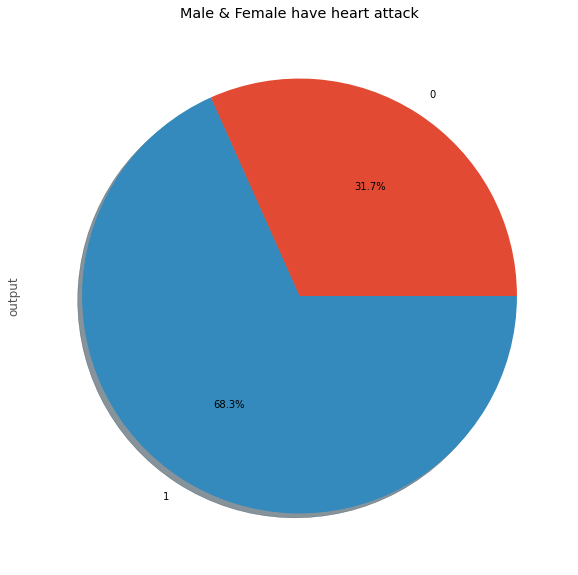

In [9]:
# make groupby and pie graph to see how the percentage [ male and female]

df.groupby('sex')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(10,10),title="Male & Female have heart attack")

### Gender of the patients
- 1 = 68.3% are **male**,
- 0 = 31.7% are **female**

<AxesSubplot:title={'center':'Chest Pain type chest pain type'}, ylabel='output'>

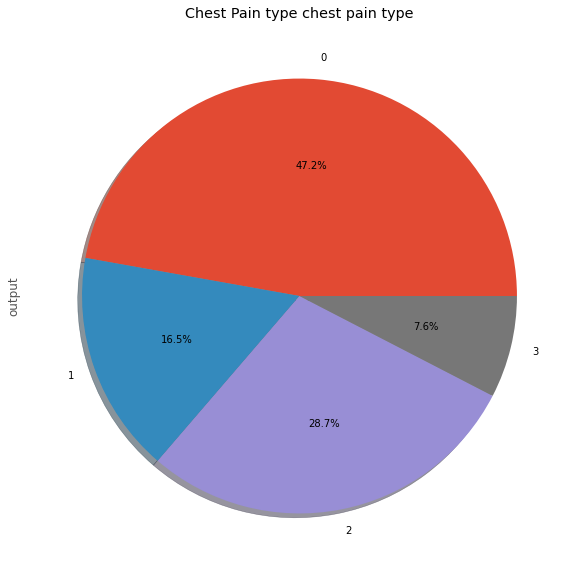

In [10]:
# make groupby and pie graph to see how the percentage [ Chest Pain type chest pain type]

df.groupby('cp')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(10,10),title="Chest Pain type chest pain type")

## cp : Chest Pain type chest pain type
- 0 : asymptomatic 47.2%
- 1 : typical angina 16.5%
- 2 : atypical angina 28.7 %
- 3 : non-anginal pain 7.6 %

<AxesSubplot:title={'center':'fasting blood sugar'}, ylabel='output'>

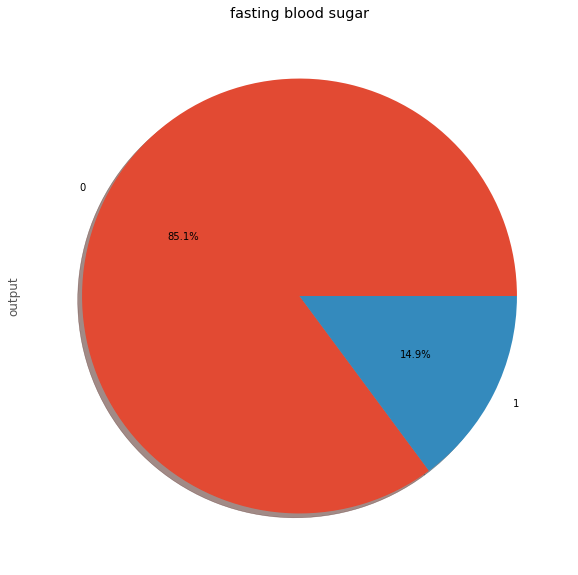

In [11]:
# make groupby and pie graph to see how the percentage [ fasting blood sugar]


df.groupby('fbs')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(10,10),title="fasting blood sugar")


### fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- 0 = 85.1 %
- 1 = 14.9 %

<AxesSubplot:title={'center':'Electrocardiographic results'}, ylabel='output'>

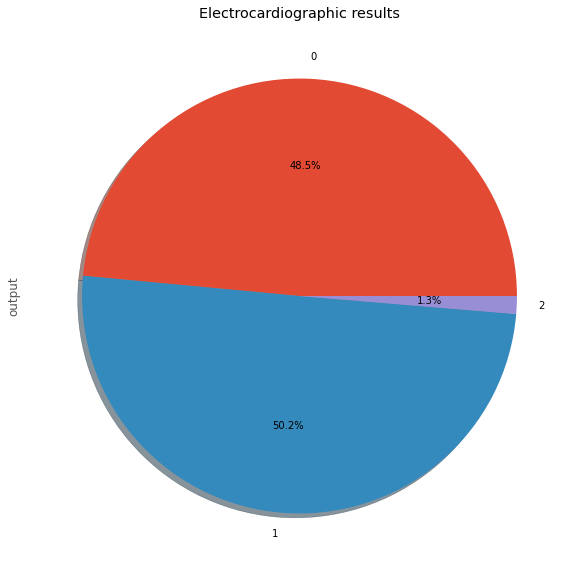

In [12]:
# make groupby and pie graph to see how the percentage [ Electrocardiographic results]


df.groupby('restecg')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True, figsize=(10,10),title="Electrocardiographic results")


## rest_ecg : resting electrocardiographic results

- Value 0: normal = 48.5%
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) = 50.2 %
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria = 1.3 %

<AxesSubplot:title={'center':'Target Variable - output'}, ylabel='output'>

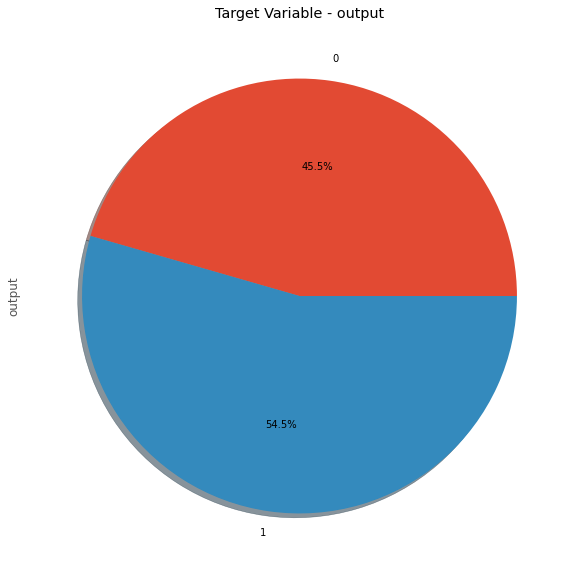

In [13]:
# make groupby and pie graph to see how the percentage [ Target Variable - output]


df.groupby('output')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(10,10),title="Target Variable - output")


## Target Variable - output
- More than half of the patients, **54.5 percent**, have a heart attack risk. The remaining **45.5 percent** .


<AxesSubplot:title={'center':'Relationship between Age and have patients heart '}, xlabel='age'>

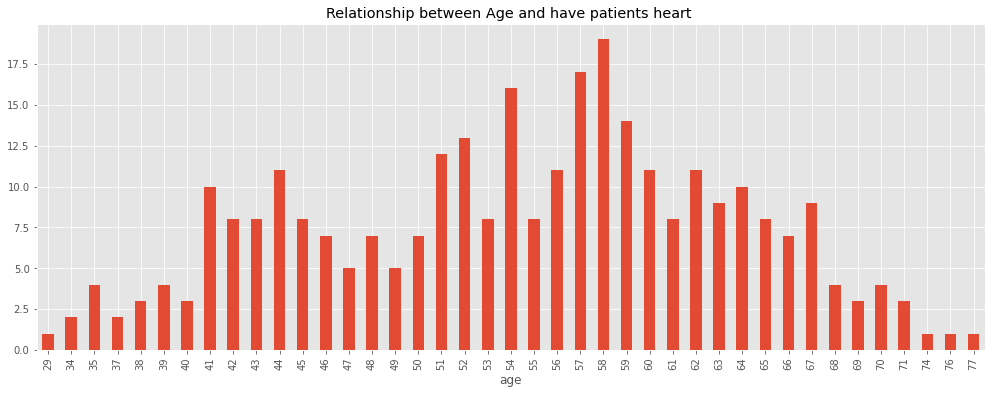

In [14]:
# make groupby and bar graph to see relationship between Age and have patients heart 


df.groupby('age')["output"].count().plot(kind="bar",figsize=(17,6), title="Relationship between Age and have patients heart ")


## Age Variable
- The vast majority of patients are between 50 and 60.

# Analysis Results 🙉🙈🙊

- After make some analysis , visual graph  and explore the data set , I see some results .


#### The vast majority of patients are between 50 and 60.
- Maybe when increasing old years have more chance of heart attack

#### Gender of the patients
-  68.3% are Male,
-  31.7% are Female


#### Chest Pain type chest pain type
- Asymptomatic 47.2%
- Typical angina 16.5%
- Atypical angina 28.7 %
- Non-anginal pain 7.6 %


#### (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- 0 = 85.1 %
- 1 = 14.9 %


#### Resting electrocardiographic results
- Normal = 48.5%
- Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) = 50.2 %
- Showing probable or definite left ventricular hypertrophy by Estes' criteria = 1.3 %


#### Target Variable - output
- More than half of the patients, 54.5 percent, have a heart attack risk. The remaining 45.5 percent 



# Preprocessing

In [15]:
from sklearn.preprocessing import StandardScaler

st_scaler = StandardScaler()
features = st_scaler.fit_transform(df.drop('output', axis = 1))

features_df = pd.DataFrame(features, columns = df.columns[:-1])
features_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


# Building a Machine Learning Model / classification score Volume

In [16]:
#Importing the basic librarires for building model - classification

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.neighbors import  KNeighborsClassifier

from sklearn.metrics import accuracy_score,r2_score

In [17]:
#Defined X value and y value , and split the data train
X = features_df
y = df["output"]    # y = quality

# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (227, 13)
X Test  :  (76, 13)
Y Train :  (227,)
Y Test  :  (76,)


In [18]:
for i in range(1,10):
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(X_train,y_train)
    pred1 = knn1.predict(X_test)
    print(f"For Knn-{i}: \n")
    print(classification_report(y_test,pred1))
    print('====================================')

For Knn-1: 

              precision    recall  f1-score   support

           0       0.78      0.80      0.79        35
           1       0.82      0.80      0.81        41

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.80      0.80      0.80        76

For Knn-2: 

              precision    recall  f1-score   support

           0       0.71      0.91      0.80        35
           1       0.90      0.68      0.78        41

    accuracy                           0.79        76
   macro avg       0.81      0.80      0.79        76
weighted avg       0.81      0.79      0.79        76

For Knn-3: 

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        35
           1       0.92      0.83      0.87        41

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87  

In [19]:
KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_train,y_train)
pred = KNN.predict(X_test)
print(f"For Knn-{i}: \n")
print(classification_report(y_test,pred))

For Knn-9: 

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        35
           1       0.90      0.93      0.92        41

    accuracy                           0.91        76
   macro avg       0.91      0.91      0.91        76
weighted avg       0.91      0.91      0.91        76



In [20]:
confusion_matrix(y_test, pred)

array([[31,  4],
       [ 3, 38]])

In [21]:
accuracy_score(y_test,pred)*100

90.78947368421053

# Notes 😃😃😃😃

- Thank for reading my analysis and my classification. 😃😃😃😃

- If you any questions or advice me please write in the comment . ❤️❤️❤️❤️

- If anyone has a model with a higher percentage, please tell me 🤝🤝🤝, it`s will support me .

# Vote ❤️😃

- If you liked my work upvote me ,


# The End 🤝🎉🤝🎉